In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("ipl_match_winner_dataset_dirty.csv")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (400, 14)


,match_id,season,venue,team1,team2,toss_winner,toss_decision,team1_runs,team1_wickets,team1_run_rate,team2_runs,team2_wickets,team2_run_rate,winner
0,1.0,2016.0,M Chinnaswamy Stadium,Sunrisers Hyderabad,Mumbai Indians,Sunrisers Hyderabad,field,167.0,8.0,8.35,183.0,9,9.15,Mumbai Indians
1,2.0,2016.0,M Chinnaswamy Stadium,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,168.0,4.0,8.40,180.0,9,9.00,Chennai Super Kings
2,3.0,2016.0,MA Chidambaram Stadium,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,146.0,-100.0,7.30,155.0,7,7.75,Royal Challengers Bangalore
3,4.0,2016.0,Rajiv Gandhi Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,139.0,6.0,6.95,146.0,5,7.30,Mumbai Indians
4,5.0,2016.0,MA Chidambaram Stadium,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,142.0,4.0,7.10,148.0,6,7.40,Royal Challengers Bangalore


In [2]:
df.columns = df.columns.str.strip()

print(df.columns)

Index(['match_id', 'season', 'venue', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'team1_runs', 'team1_wickets', 'team1_run_rate',
       'team2_runs', 'team2_wickets', 'team2_run_rate', 'winner'],
      dtype='object')


In [3]:
cols = ["venue", "team1", "team2", "toss_winner", "toss_decision", "winner"]
df = df[cols]

df = df.dropna()


In [4]:
df = df.dropna()

print(df.head())
print(df.isnull().sum())

                    venue                        team1  \
0   M Chinnaswamy Stadium          Sunrisers Hyderabad   
1   M Chinnaswamy Stadium  Royal Challengers Bangalore   
2  MA Chidambaram Stadium               Delhi Capitals   
3    Rajiv Gandhi Stadium  Royal Challengers Bangalore   
4  MA Chidambaram Stadium          Sunrisers Hyderabad   

                         team2                  toss_winner toss_decision  \
0               Mumbai Indians          Sunrisers Hyderabad         field   
1          Chennai Super Kings          Chennai Super Kings         field   
2  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
3               Mumbai Indians  Royal Challengers Bangalore         field   
4  Royal Challengers Bangalore          Sunrisers Hyderabad           bat   

                        winner  
0               Mumbai Indians  
1          Chennai Super Kings  
2  Royal Challengers Bangalore  
3               Mumbai Indians  
4  Royal Challengers Ba

In [5]:
df["team1_win"] = (df["winner"] == df["team1"]).astype(int)


In [6]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
cat_cols = ["venue", "team1", "team2", "toss_winner", "toss_decision"]

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le


In [7]:
X = df[["venue", "team1", "team2", "toss_winner", "toss_decision"]]
y = df["team1_win"]


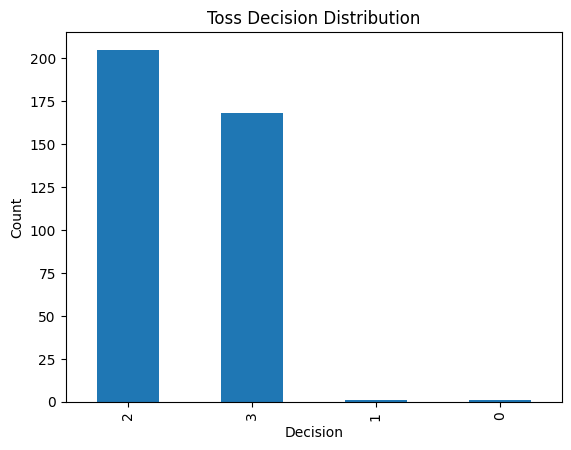

In [8]:
import matplotlib.pyplot as plt

df["toss_decision"].value_counts().plot(kind="bar")
plt.title("Toss Decision Distribution")
plt.xlabel("Decision")
plt.ylabel("Count")
plt.show()


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
from sklearn.ensemble import RandomForestClassifier

pre_match_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

pre_match_model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = pre_match_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9866666666666667
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.97      1.00      0.99        39

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [12]:
df = pd.read_csv("alt_player_runs_wickets_dataset.csv")
df.head()

,season,venue,team,opposition_team,player,player_role,balls_faced,strike_rate,runs_scored,overs_bowled,economy,wickets
0,2015,Wankhede Stadium,Mumbai Indians,Sunrisers Hyderabad,Ravindra Jadeja,bowler,NaN,NaN,NaN,2.0,9.49,5.0
1,2015,Eden Gardens,Delhi Capitals,Kolkata Knight Riders,Rohit Sharma,batsman,32.0,123.32,39.0,NaN,NaN,NaN
2,2015,MA Chidambaram Stadium,Delhi Capitals,Kolkata Knight Riders,Jasprit Bumrah,bowler,NaN,NaN,NaN,4.0,8.72,2.0
3,2015,MA Chidambaram Stadium,Royal Challengers Bangalore,Sunrisers Hyderabad,Mohammed Shami,bowler,NaN,NaN,NaN,2.0,9.62,2.0
4,2015,M Chinnaswamy Stadium,Delhi Capitals,Sunrisers Hyderabad,Shubman Gill,batsman,27.0,130.89,35.0,NaN,NaN,NaN


In [13]:
df.isna().sum()


season               0
venue                0
team                 0
opposition_team      0
player               0
player_role          0
balls_faced        688
strike_rate        688
runs_scored        688
overs_bowled       662
economy            662
wickets            662
dtype: int64

In [14]:
bat_df = df[df["player_role"] == "batsman"].copy()
bowl_df = df[df["player_role"] == "bowler"].copy()


In [15]:
bat_df = df[df["player_role"] == "batsman"].copy()

bat_df = bat_df.dropna(
    subset=["runs_scored", "balls_faced", "strike_rate"]
)


In [16]:
bat_df = bat_df.drop(columns=["player"])


In [17]:
bowl_df = bowl_df.drop(
    columns=["balls_faced", "strike_rate", "runs_scored"],
    errors="ignore"
)

print(bowl_df.columns)

Index(['season', 'venue', 'team', 'opposition_team', 'player', 'player_role',
       'overs_bowled', 'economy', 'wickets'],
      dtype='object')


In [18]:
bowl_df.isna().sum()


season             0
venue              0
team               0
opposition_team    0
player             0
player_role        0
overs_bowled       0
economy            0
wickets            0
dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ["venue", "team", "opposition_team", "player"]

label_encoders_bowl = {}

for col in cat_cols:
    le = LabelEncoder()
    bowl_df[col] = le.fit_transform(bowl_df[col])
    label_encoders_bowl[col] = le


In [20]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ["venue", "team", "opposition_team"]
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    bat_df[col] = le.fit_transform(bat_df[col])
    label_encoders[col] = le


In [21]:
bat_df.describe()



,season,venue,team,opposition_team,balls_faced,strike_rate,runs_scored,overs_bowled,economy,wickets
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,0.0,0.0,0.0
mean,2019.015106,1.962236,2.459215,2.503021,39.188822,140.597266,54.506042,NaN,NaN,NaN
std,2.590524,1.431257,1.699158,1.717356,17.033712,22.992658,25.669064,NaN,NaN,NaN
min,2015.000000,0.000000,0.000000,0.000000,10.000000,100.510000,11.000000,NaN,NaN,NaN
25%,2017.000000,1.000000,1.000000,1.000000,25.000000,120.977500,32.000000,NaN,NaN,NaN
50%,2019.000000,2.000000,2.000000,3.000000,39.000000,138.835000,53.000000,NaN,NaN,NaN
75%,2021.000000,3.000000,4.000000,4.000000,53.000000,162.100000,72.000000,NaN,NaN,NaN
max,2023.000000,4.000000,5.000000,5.000000,70.000000,179.900000,123.000000,NaN,NaN,NaN


In [22]:
bowl_df.describe()

,season,venue,team,opposition_team,player,overs_bowled,economy,wickets
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,2018.985465,2.030523,2.600291,2.444767,2.066860,2.938953,7.547878,2.579942
std,2.577434,1.430770,1.702417,1.617724,1.407468,0.817776,1.410561,1.678533
min,2015.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,0.000000
25%,2017.000000,1.000000,1.000000,1.000000,1.000000,2.000000,6.360000,1.000000
50%,2019.000000,2.000000,3.000000,2.000000,2.000000,3.000000,7.530000,3.000000
75%,2021.000000,3.000000,4.000000,4.000000,3.000000,4.000000,8.792500,4.000000
max,2023.000000,4.000000,5.000000,5.000000,4.000000,4.000000,9.980000,5.000000


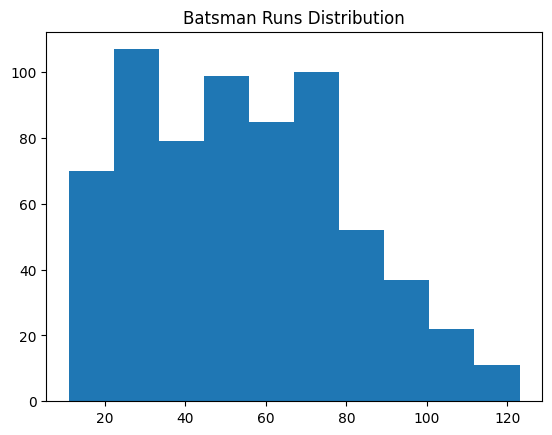

In [23]:
import matplotlib.pyplot as plt

plt.hist(bat_df["runs_scored"], bins=10)
plt.title("Batsman Runs Distribution")
plt.show()


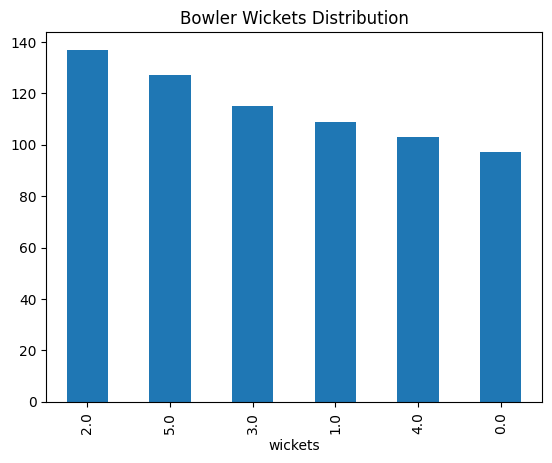

In [24]:
bowl_df["wickets"].value_counts().plot(kind="bar")
plt.title("Bowler Wickets Distribution")
plt.show()


In [25]:
X_bat = bat_df[
    ["season", "venue", "team", "opposition_team",
     "balls_faced", "strike_rate"]
]

y_bat = bat_df["runs_scored"]


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_bat, y_bat,
    test_size=0.2,
    random_state=42
)


In [27]:
from sklearn.ensemble import RandomForestRegressor

bat_model = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

bat_model.fit(X_train, y_train)


,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
from sklearn.metrics import r2_score, mean_absolute_error

pred_runs = bat_model.predict(X_test)

print("R² Score:", r2_score(y_test, pred_runs))
print("MAE:", mean_absolute_error(y_test, pred_runs))


R² Score: 0.995229353508739
MAE: 1.3052380952380955


In [29]:
X_bowl = bowl_df.drop(["wickets", "player_role"], axis=1)
y_bowl = bowl_df["wickets"]

print(X_bowl.dtypes)


season               int64
venue                int64
team                 int64
opposition_team      int64
player               int64
overs_bowled       float64
economy            float64
dtype: object


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_bowl, y_bowl,
    test_size=0.2,
    random_state=42
)


In [31]:
bowl_df["wicket_class"] = bowl_df["wickets"].apply(
    lambda x: "High" if x >= 2 else "Low"
)


In [32]:
X = bowl_df[["overs_bowled", "economy"]]
y = bowl_df["wicket_class"]



In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)



,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred) * 100)
print(classification_report(y_test, pred))


Accuracy: 63.04347826086957
              precision    recall  f1-score   support

        High       0.71      0.80      0.75        96
         Low       0.34      0.24      0.28        42

    accuracy                           0.63       138
   macro avg       0.53      0.52      0.52       138
weighted avg       0.60      0.63      0.61       138



In [35]:
y.value_counts(normalize=True) * 100


wicket_class
High    70.05814
Low     29.94186
Name: proportion, dtype: float64

In [36]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"
)

clf.fit(X_train, y_train)
pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
print("Improved Accuracy:", accuracy_score(y_test, pred) * 100)


Improved Accuracy: 63.76811594202898


In [37]:
import joblib

# save pre-match winner model
joblib.dump(pre_match_model, "pre_match_model.pkl")

['pre_match_model.pkl']

In [38]:
joblib.dump(encoders, "pre_match_encoders.pkl")

['pre_match_encoders.pkl']

In [39]:
joblib.dump(bat_model, "runs_model.pkl")

['runs_model.pkl']

In [40]:
joblib.dump(label_encoders, "bat_label_encoders.pkl")

['bat_label_encoders.pkl']

In [41]:
joblib.dump(clf, "wicket_model.pkl")

['wicket_model.pkl']